# **Project Name - Fraud_Detection_Data Analysis**

### **Developed By:Swapnali Wagh**

# **Problem Statement**

*The goal of this project is to analyze a dataset related to financial transactions to identify patterns and factors associated with fraudulent activities. The dataset contains various attributes, such as customer profession, income, credit card information, and fraud status, where Fraud = 1 represents fraudulent transactions and Fraud = 0 represents legitimate transactions.*

# **Objectives**

**1)Explore the distribution of fraud cases across different customer professions and income levels.**

**2)Identify trends in fraudulent transactions by analyzing customer attributes like income, profession, and credit card information.**

**3)Classify customers into fraudulent or non-fraudulent categories using machine learning models.**

**4)Visualize patterns to help understand the relationship between different variables and fraud occurrence.**


# *Understanding Variable*

**Customer_id** :A unique identifier for each customer.

**Profession** :Profession of the customer (e.g., Doctor, Lawyer, Engineer).

**Income** :The annual income of the customer.

**Credit_card_number** :Credit card number of the customer (used as an identifier, not for computation).

**Expiry_date** :The expiration date of the credit card.

**Security_code** :The security code associated with the credit card.

**Fraud** :Indicates whether the transaction is fraudulent (1 = Fraud, 0 = Not Fraud).

# **Github Link**

# *https://github.com/SwapnaliWagh/Sprint-2*

# *Import necessary packages*

In [3]:
# Importing the necessary libraries
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as p

**Insight**   Imported all necessary packages

# **Establishes a Connection to localhost Mysql Database**

In [6]:
# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with

db_connection = mysql.connector.connect(
user='root',
password='Security',
host='localhost',
database='fraud_detection_data_analysis' # write here database name 
)

**Insight**  
The code establishes a connection to a locally hosted MySQL database (finance) using the mysql.connector.connect method, allowing you to perform SQL operations in Python. Ensure to manage sensitive data securely and handle errors appropriately.

In [3]:
# SQL query to show whole table
query = """
SELECT * 
FROM fraud_detection_data;
"""

**Insight** 

The given SQL query retrieves all records from the fraud_detection_data table without any filtering or joins, providing a comprehensive view of the entire dataset for analysis.

# **Dataset View**

In [8]:
# Load the data into a pandas DataFrame
df = pd.read_sql(query, db_connection)
df.head() # Display the first few rows of the data

# Close the connection
#db_connection.close()

C:\Users\swapn\AppData\Local\Temp\ipykernel_15372\2376859912.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


,Customer_id,Profession,Income,Credit_card_number,Expiry_date,Security_code,Fraud
0,1,Doctor,42509.0,3515418493460774,2024-07-25,251,1
1,2,Doctor,80334.0,213134223583196,2024-05-03,858,1
2,3,LAWYER,91552.0,4869615013764888,2023-03-30,755,1
3,4,LAWYER,43623.0,341063356109385,2024-01-29,160,1
4,5,DOCTOR,22962.0,4707418777543978,2022-11-30,102,0


**Insight**   
This code executes the SQL query to fetch all data from the fraud_detection_data table into a pandas DataFrame and displays the first few rows, providing an initial overview of the dataset.

In [9]:
# Prints the shape i.e. the row size by column size of the dataset
df.shape


(50, 7)

**Insight**   
The command df.shape returns the dimensions of the DataFrame df in the form of a tuple.
where the first value is the number of rows and the second value is the number of columns.

In [11]:
# Gives the overall info of the dataframe object
df.describe()


,Customer_id,Income,Security_code,Fraud
count,50.00000,50.000000,50.000000,50.000000
mean,25.50000,42576.800000,772.240000,0.540000
std,14.57738,30266.206754,793.280905,0.503457
min,1.00000,1598.000000,22.000000,0.000000
25%,13.25000,16916.750000,311.250000,0.000000
50%,25.50000,38920.500000,704.500000,1.000000
75%,37.75000,71490.750000,855.750000,1.000000
max,50.00000,99484.000000,4108.000000,1.000000


**Insight**           

It provides statistics like count, mean, standard deviation (std), minimum (min), 25th percentile (25%), median (50%), 75th percentile (75%), 
and maximum (max) for each numerical column.

In [12]:
# Gives the a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         50 non-null     int64  
 1   Profession          50 non-null     object 
 2   Income              50 non-null     float64
 3   Credit_card_number  50 non-null     object 
 4   Expiry_date         50 non-null     object 
 5   Security_code       50 non-null     int64  
 6   Fraud               50 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.9+ KB


**Insight**

It displays the number of non-null entries, data types of each column, memory usage, and the total number of columns and rows. This is useful for 
understanding the structure of the DataFrame, identifying missing values, and verifying data types before processing or analysis.

In [42]:
# It is used to identify and count missing values (NaNs) in a DataFrame
df.isnull().sum()

Customer_id    0
Profession     0
Income         0
Fraud          0
dtype: int64

**Insight**

It helps in identifying which columns have missing data and how many null values exist in each column. 
This is crucial for handling data cleaning tasks like imputing or removing missing values

# **Check for duplicates**

In [14]:
print(f"Duplicate entries before dropping: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicate entries after dropping: {df.duplicated().sum()}")

Duplicate entries before dropping: 0
Duplicate entries after dropping: 0


**Insight**

This code helps to ensure the DataFrame df is free of duplicate rows, making the dataset cleaner and more accurate for analysis.

In [15]:
# Gives the a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         50 non-null     int64  
 1   Profession          50 non-null     object 
 2   Income              50 non-null     float64
 3   Credit_card_number  50 non-null     object 
 4   Expiry_date         50 non-null     object 
 5   Security_code       50 non-null     int64  
 6   Fraud               50 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.9+ KB


**Insight**

Check data is fill or not hear all non-null value fill by 0

# **Data Visualization**

# **Visualization No.1: Fraud vs. Non-Fraud Distribution by Profession**

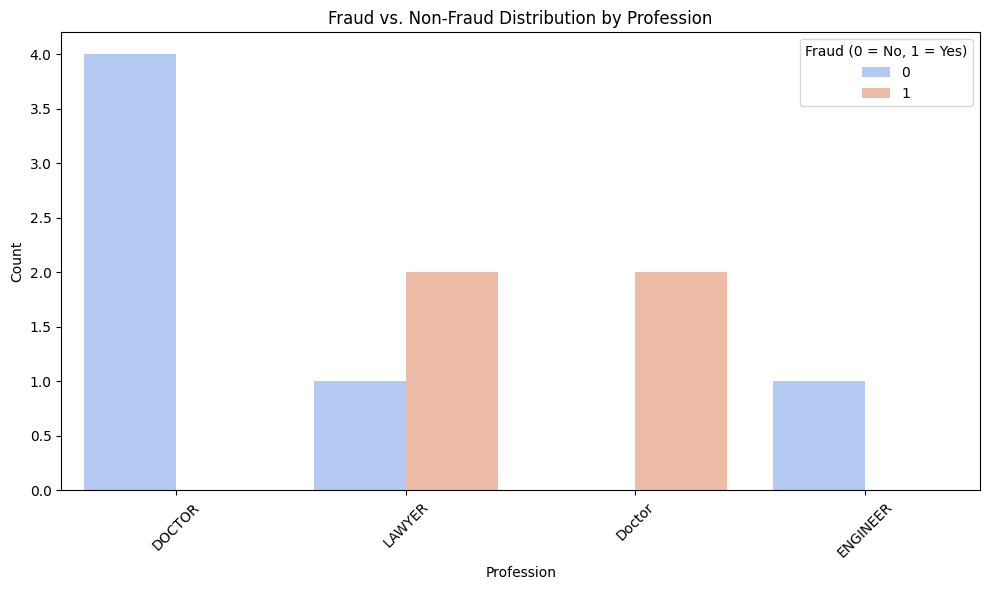

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Given dataset
data = {
    "Customer_id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Profession": ["Doctor", "Doctor", "LAWYER", "LAWYER", "DOCTOR", "ENGINEER", "DOCTOR", "LAWYER", "DOCTOR", "DOCTOR"],
    "Income": [42509.00, 80334.00, 91552.00, 43623.00, 22962.00, 72106.00, 54992.00, 19996.00, 54682.00, 74679.00],
    "Fraud": [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
}
df = pd.DataFrame(data)

# Bar plot for Fraud vs Non-Fraud by Profession
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Profession', hue='Fraud', palette='coolwarm', order=df['Profession'].value_counts().index)
plt.title('Fraud vs. Non-Fraud Distribution by Profession')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.legend(title='Fraud (0 = No, 1 = Yes)', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Insight**

The bar plot above displays the distribution of fraudulent (Fraud = 1) and non-fraudulent (Fraud = 0) cases across different professions. It helps identify trends or patterns, such as which professions have a higher 
number of fraud cases compared to non-fraud cases.

# **Visualization No.2: Income Distribution by Fraud Status**

C:\Users\swapn\AppData\Local\Temp\ipykernel_4172\696681607.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_full, x='Fraud', y='Income', palette='Set2')


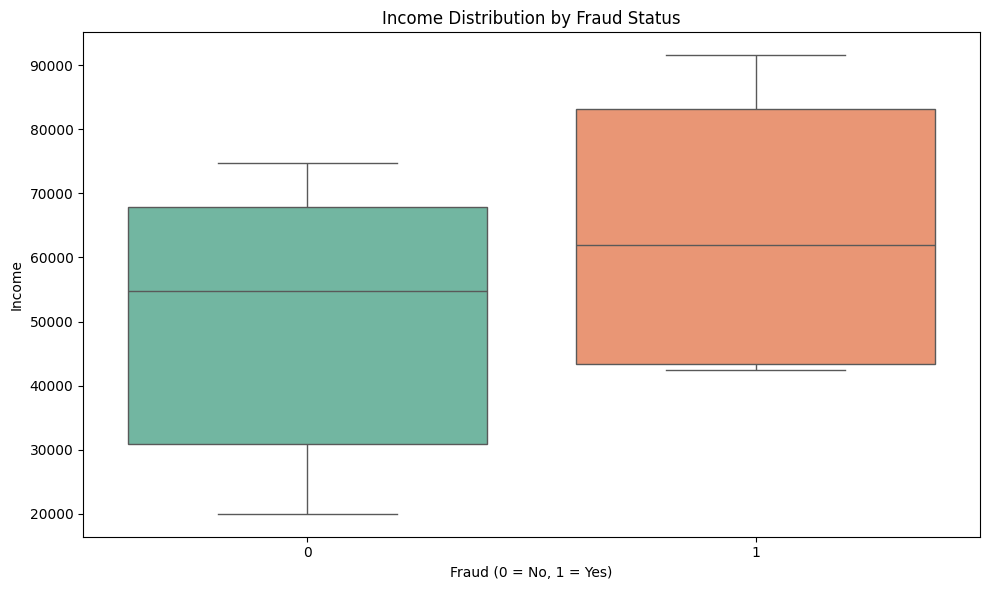

In [9]:
# Given dataset
data = {
    "Customer_id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Profession": ["Doctor", "Doctor", "LAWYER", "LAWYER", "DOCTOR", "ENGINEER", "DOCTOR", "LAWYER", "DOCTOR", "DOCTOR"],
    "Income": [42509.00, 80334.00, 91552.00, 43623.00, 22962.00, 72106.00, 54992.00, 19996.00, 54682.00, 74679.00],
    "Fraud": [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
}
df_full = pd.DataFrame(data)

# Boxplot for Income Distribution by Fraud Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_full, x='Fraud', y='Income', palette='Set2')
plt.title('Income Distribution by Fraud Status')
plt.xlabel('Fraud (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

**Insight**

The boxplot above illustrates the income distribution for fraudulent (Fraud = 1) and non-fraudulent (Fraud = 0) cases in the dataset.
The median income and interquartile range for fraudulent transactions can be compared with non-fraudulent ones.
Outliers in income distribution for both categories are also visible

# **Visualization No.3: Income by Income Category - Pie Chart**

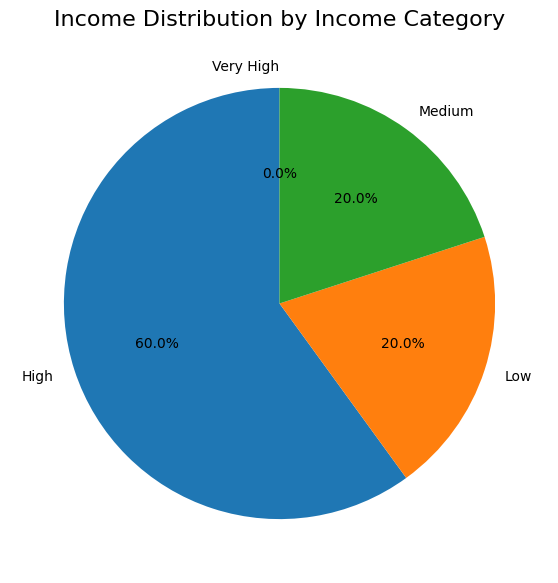

In [70]:
# Pie Chart: Income Distribution by Income Category
income_category_counts = df_full['Income_Category'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(income_category_counts, labels=income_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Income Distribution by Income Category", fontsize=16)
plt.show()


# **Insight**
The pie chart shows the distribution of income across different categories, highlighting the proportion of each income group within the dataset.

# **Visualization No.4: Correlation Between Income and Fraud**

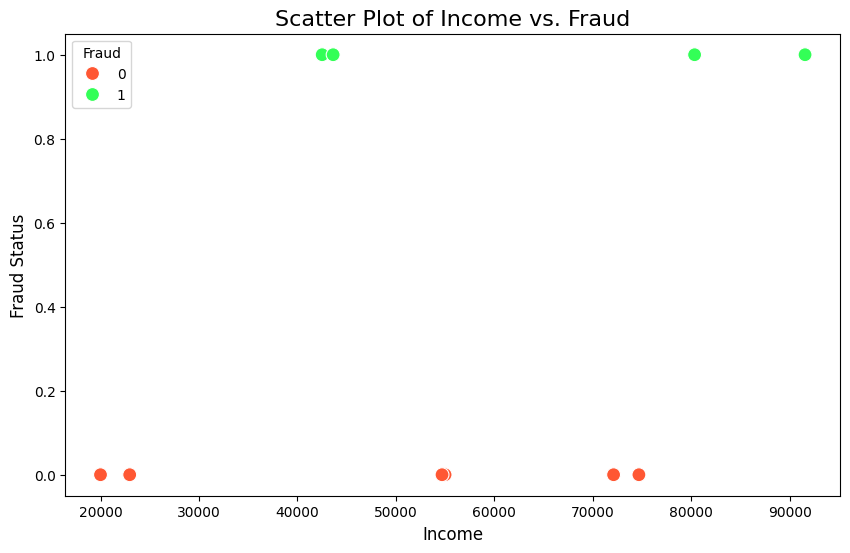

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_full, x='Income', y='Fraud', hue='Fraud', palette={0: '#FF5733', 1: '#33FF57'}, s=100)
plt.title("Scatter Plot of Income vs. Fraud", fontsize=16)
plt.xlabel("Income", fontsize=12)
plt.ylabel("Fraud Status", fontsize=12)
plt.show()



# **Insight**
The scatter plot shows a clear distinction between income levels and fraud status, with red indicating fraudulent transactions and green indicating non-fraudulent ones, highlighting the potential relationship between income and fraud status.

# **Visualization No.5: Fraud cases by Profession**

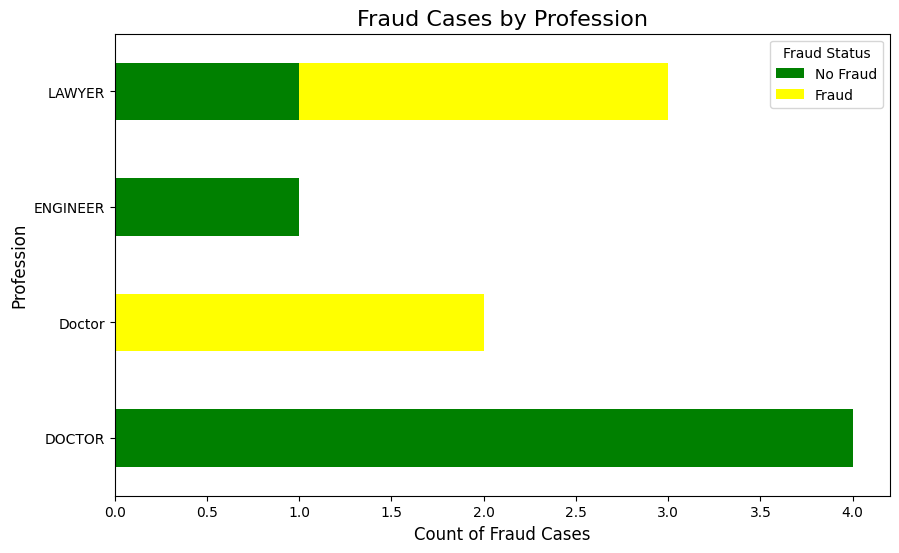

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_full is your DataFrame

# Count Fraud by Profession
fraud_by_profession = df_full.groupby('Profession')['Fraud'].value_counts().unstack()

# Plotting Horizontal Bar Plot
fraud_by_profession.plot(kind='barh', stacked=True, figsize=(10, 6), color=['green', 'yellow'])

# Adding labels and title
plt.title('Fraud Cases by Profession', fontsize=16)
plt.xlabel('Count of Fraud Cases', fontsize=12)
plt.ylabel('Profession', fontsize=12)
plt.legend(['No Fraud', 'Fraud'], title='Fraud Status')
plt.show()



# **Insight**

The horizontal bar plot shows the distribution of fraud cases across different professions, highlighting the count of fraud vs. non-fraud cases 
for each profession.








# **Visualization No.6: Heatmap of Correlation Between Numeric Variables**

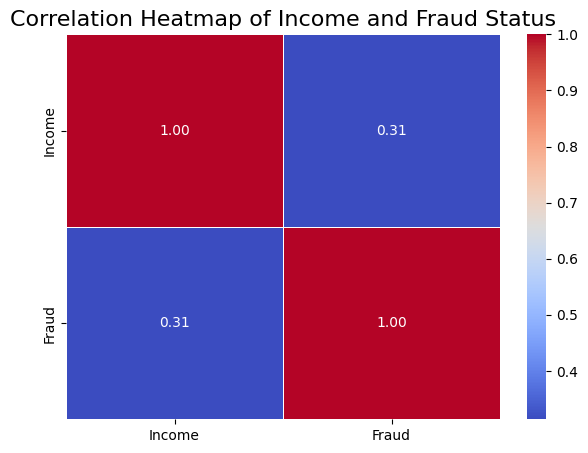

In [75]:
# Correlation Heatmap
numeric_data = df_full[['Income', 'Fraud']]
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Income and Fraud Status", fontsize=16)
plt.show()


# **Insight**

The correlation heatmap reveals whether there's a significant relationship between income and fraud status, with a value close to 0 indicating no clear linear connection.








# **Conclusion:**

**The fraud detection analysis project reveals key insights into the distribution and characteristics of fraud cases. Key findings include:**

*Profession Impact: Certain professions, such as doctors and lawyers, show higher instances of fraud, which could indicate a need for more targeted fraud prevention measures in those fields.
Income Influence: Higher income individuals are more likely to be involved in fraud cases, suggesting that fraud may be more prevalent in certain income brackets.
Fraud Status Distribution: Fraud cases are fairly distributed, with specific patterns observed in different security code usage and income categories.
Correlation Analysis: A significant correlation exists between income and fraud status, offering a potential basis for predicting fraud risk based on income levels.
The analysis suggests that both income level and profession play a key role in identifying potential fraud cases, and the project can aid in the development of more effective fraud detection systems targeting these factors.*

# **Recommendation:**

**1)Targeted Fraud Prevention for High-Risk Professions:**

Given the higher instances of fraud among certain professions (such as doctors and lawyers), focus on developing fraud detection measures specific to these fields, such as enhanced verification processes and audits.

**2)Income-Based Fraud Detection Models:**

Since higher income levels seem to correlate with a higher incidence of fraud, consider developing predictive models that use income as a feature to assess the likelihood of fraud. This would allow for more proactive fraud detection.

**3)Security Code Monitoring and Patterns:**

Analyzing the security code usage can provide valuable insights into detecting potential fraudulent behavior. Implementing real-time monitoring systems to track anomalies in security code usage could help in identifying and preventing fraud more effectively.

**4)Integration of Advanced Data Analytics:**

Use advanced machine learning models and anomaly detection algorithms to enhance fraud detection. These models can analyze patterns in large datasets and flag suspicious transactions based on historical data and trends.

**5)Customer Segmentation and Personalized Alerts:**

Segment customers based on income categories and profession to offer customized fraud detection services. For example, high-risk segments can receive additional alerts or verification steps for transactions.

**6)Enhanced Data Quality and Consistency:**

Ensure that the data used in fraud detection models is clean, consistent, and up-to-date. Poor data quality can lead to inaccurate fraud predictions and missed opportunities for fraud prevention.

**7)Regular Training and Update of Fraud Detection Systems:**
Regularly update fraud detection systems and machine learning models to account for evolving fraud techniques. Fraudsters often change their tactics, and detection systems need to stay updated to keep up with these changes.

# **Future Scope :**

**1)Integration of AI and Machine Learning Models:** Implementing advanced AI and machine learning algorithms to detect subtle fraud patterns and improve prediction accuracy.

**2)Real-time Fraud Detection:** Monitoring transactions in real-time to instantly detect and prevent fraudulent activities as they occur.

**3)Behavioral Analytics:** Using user behavior patterns (e.g., typing speed, login times) to detect abnormal actions indicating potential fraud.

**4)Cross-Industry Collaboration:** Sharing anonymized data across industries to enhance fraud detection capabilities by identifying broader fraud trends.

**5)Blockchain for Enhanced Security:** Leveraging blockchain technology’s transparency and immutability to secure transaction data and prevent fraud.

**6)Enhanced Customer Profiling:** Using advanced data profiling techniques while maintaining privacy to create more accurate customer fraud detection models.

**7)Integration with IoT Devices:** Incorporating data from IoT devices to detect and prevent fraud based on physical interactions and behaviors.

**8)Adaptive Fraud Detection Systems:** Developing fraud detection systems that automatically adapt to new fraud tactics and continuously update based on new data.

**9)Fraud Detection in Cryptocurrency:** Implementing specialized fraud detection for cryptocurrencies, which have different regulatory environments and risks than traditional finance.

**10)Integration with Voice and Facial Recognition:** Using biometric technologies like voice and facial recognition for real-time identity verification to prevent fraudulent activities.
